<a href="https://colab.research.google.com/github/emmad225/DataScienceCoursework/blob/main/DSHW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv("insurance.csv")

#1

a.

In [ ]:
#number of rows/columns
#names of columns
print(data.shape)
print(data.columns)

In this data set there are 1000 rows and 4 columns. The names of the four columns are customer ID, loss, premium, and the name of the insurance company.

In [ ]:
#for numeric columns (customer ID, loss, premium) what are the min/max?
print(data.describe())

In [ ]:
cid_mean = data["customer_id"].mean()
print(cid_mean)

l_mean = data["loss"].mean()
print(l_mean)

p_mean = data["premium"].mean()
print(p_mean)

Min/Max
*   The min of the customer ID column is 1 while the max is 1000.
*   The min of the loss column is 0 while the max is 100,000.
*   The min of the premium column is -95.99 while the max is 1101.47.

Mean
*    The mean of customer ID is: 500.5
*    The mean of loss is: 480.7371
*    The mean of premium is: 510.28283

b.

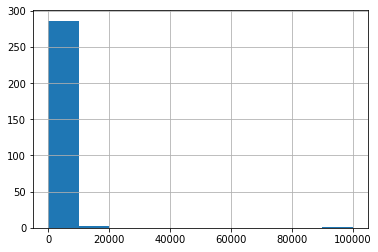

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
esurance = data[(data)['company'] == "Esurance"]
esurance.loss.hist()

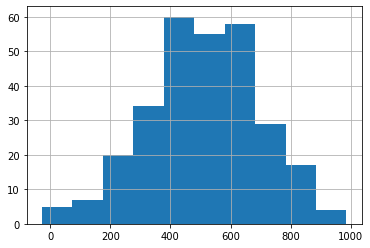

In [ ]:
esurance.premium.hist()

In [ ]:
statefarm = data[(data)['company'] == "StateFarm"]
statefarm.loss.hist()

In [ ]:
statefarm.premium.hist()

In [ ]:
geico = data[(data)['company'] == "Geico"]
geico.loss.hist()

In [ ]:
geico.premium.hist()

The histogram plots of losses for all three companies are all relatively close to 0 with a few outliers, while the premiums for each company follows a bell curve shape ranging rom 0,1000 with the maximum in all cases close to 500.

c.

In [ ]:
loss = data.loc[data.company =='Esurance', ['loss']].sum()
prem = data.loc[data.company =='Esurance', ['premium']].sum()

print(loss)
print(prem)

loss    210695.18
dtype: float64
premium    147477.66
dtype: float64


Loss Ratio of Esurance = 1.43

In [ ]:
loss = data.loc[data.company =='StateFarm', ['loss']].sum()
prem = data.loc[data.company =='StateFarm', ['premium']].sum()

print(loss)
print(prem)

Loss Ratio for StateFarm = .97

In [ ]:
loss = data.loc[data.company =='Geico', ['loss']].sum()
prem = data.loc[data.company =='Geico', ['premium']].sum()

print(loss)
print(prem)

Loss Ratio for Geico = .43

The company with the best loss ratio is Geico while the company with the worst loss ratio is Esurance. This means that in most cases, Esurance is paying out more in claims than it is receiving in premiums, making its business more or less unprofitable.

# 2.

a. a.

In [ ]:
e_loss = np.array(data.loc[data.company =='Esurance', ['loss']])
e_premium = np.array(data.loc[data.company =='Esurance', ['premium']])

s_loss = np.array(data.loc[data.company =='StateFarm', ['loss']])
s_premium = np.array(data.loc[data.company =='StateFarm', ['premium']])

g_loss = np.array(data.loc[data.company =='Geico', ['loss']])
g_premium = np.array(data.loc[data.company =='Geico', ['premium']])

In [ ]:
def bootstrap(loss, premium):
  loss_dataset = np.squeeze(loss)
  N = len(loss_dataset)
  premium_dataset = np.squeeze(premium)
  M = 10000
  bootstrap_data = []
  bootstrap_loss = []
  bootstrap_premium = []

  for i in range(M):
      index= np.random.choice(N, N, replace = True)
      datacopy_loss = loss[index]
      datacopy_premium = premium[index]
      bootstrap_data.append(sum(datacopy_loss)/sum(datacopy_premium))
  return bootstrap_data


b.

In [ ]:
e_ratio = bootstrap(e_loss, e_premium)

In [ ]:
s_ratio = bootstrap(s_loss, s_premium)

In [ ]:
g_ratio = bootstrap(g_loss, g_premium)

c.

In [ ]:
np.quantile(e_ratio, [0.025, 0.975])

array([0.49011117, 2.98594014])

In [ ]:
np.quantile(s_ratio, [0.025, 0.975])


array([0.66655348, 1.31851887])

In [ ]:
np.quantile(g_ratio, [0.025, 0.975])

array([0.20990023, 0.68373884])

Using the quantile function call in numpy and the ratios we calculated for each insurance company above, we are able to compute the 95% confidence intervals and find how much of an overlap there exists. For the three companies, we can see that the interval of StateFarm (0.67, 1.3) is contained within the interval for Esurance (0.5, 3) and there is signiciant overlap. Similarly, there is an overlap that exists between the intervals of Esurance and Geico as well. However, there is no overlap between StateFarm (0.67, 1.3) against the interval of Geico (0.2, 0.7) so we can expect the loss ratio of StateFarm to be higher than Geico in the next year.

#3

a.

In [ ]:
from scipy.stats import binom
from scipy.stats import bernoulli
import numpy as np

0.47
0.2490999999999999
0.4990991885387111


(array([53.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 47.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

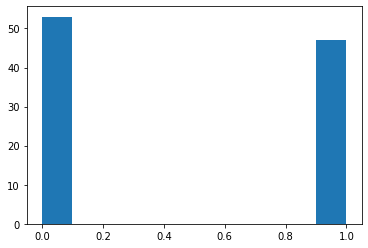

In [ ]:
X=bernoulli.rvs(0.5, size=100)
print(np.mean(X))
print(np.var(X))
print(np.std(X))
plt.hist(X)

For this bernoulli random variable, the mean is 0.47, the variance is 0.25 and the standard deviation is 0.50. The shape of the graoh shows two overarching results, one around 0.0-0.1 and another between 0.9-1.0. In this real world this could represent whether a team wins or loses a basketball game.

2.21
1.9258999999999997
1.387767992137014


(array([ 8., 23.,  0., 36.,  0., 17.,  8.,  0.,  5.,  3.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

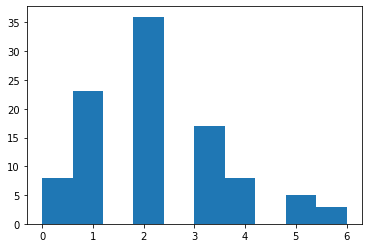

In [ ]:
X=binom.rvs(20, 0.1, size=100)
print(np.mean(X))
print(np.var(X))
print(np.std(X))
plt.hist(X)

The mean of this binomial random variable is 2.21, the variance is 1.93, and the standard deviation is 1.39. This results of this graph are more distributed over a greater range of number. In the real world, this could represent how many questions an indiidual gets correct on an exam of 30 questions.

1.9853837036571793
0.7761907318264754
0.8810168737467378


(array([ 3.,  2., 11.,  5., 14., 19., 20., 11.,  9.,  6.]),
 array([-0.28799513,  0.11688552,  0.52176616,  0.92664681,  1.33152745,
         1.7364081 ,  2.14128874,  2.54616939,  2.95105003,  3.35593068,
         3.76081132]),
 <a list of 10 Patch objects>)

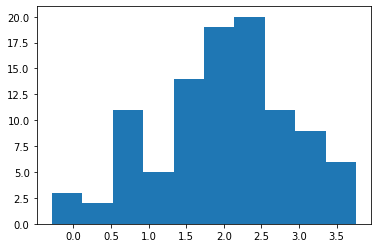

In [ ]:
X = np.random.normal(2, 1, size=100)
print(np.mean(X))
print(np.var(X))
print(np.std(X))
plt.hist(X)

The mean of this normal random example is 1.99, the variance is 0.78, and the standard deviation is 0.88. This histogram also shows varying results but they are much more central to each other. In the real world this could represent the  height of a man if chosen at random.